# Variational AutoEncoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vae import VariationalAutoencoder

### Generate data

In [2]:
size = 100000
d = 12

center = np.random.randint(1,d-1,size=(size,2))
height = np.random.randint(1,d//2-1,size=size)
width =  np.random.randint(1,d//2-1,size=size)

X = np.zeros((size,d,d),dtype=int)

# paint rectangles
for i in range (len(X)):
    left = min(max(center[i,0]-width[i]//2,0),d-1)
    right = min(max(center[i,0]+width[i]//2,0),d-1)
    top = min(max(center[i,1]+height[i]//2,0),d-1)
    bottom = min(max(center[i,1]-height[i]//2,0),d-1)
    # fix single lines
    if abs(left-right) < 3:
        if (left>0):
            left-=1
        if (right<d-1):
            right+=1
    if abs(bottom-top) < 3:
        if (bottom>0):
            bottom-=1
        if (top<d-1):
            top+=1
    X[i,top,left:right+1] = 1
    X[i,bottom,left:right] = 1
    X[i,bottom:top,left] = 1
    X[i,bottom:top,right] = 1

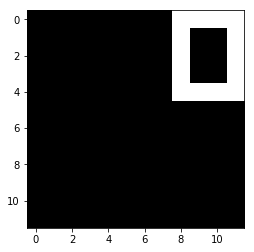

In [3]:
i = np.random.choice(range(len(X)))
plt.imshow(X[i],cmap='gray')
plt.show()

In [4]:
# flatten
X = X.reshape(size,-1)
X.shape

(100000, 144)

### Generate and train encoder

In [6]:
vae = VariationalAutoencoder(144, [48,4])

** After several iterations, it finally converged and reconstructions were satisfactory **

In [22]:
vae.fit(X,epochs=5)

Epoch: 1
Cost: -1163624.522644043
Epoch: 2
Cost: -1155887.308166504
Epoch: 3
Cost: -1150346.8211975098
Epoch: 4
Cost: -1144217.289276123
Epoch: 5
Cost: -1139266.971130371


### Reconstruction

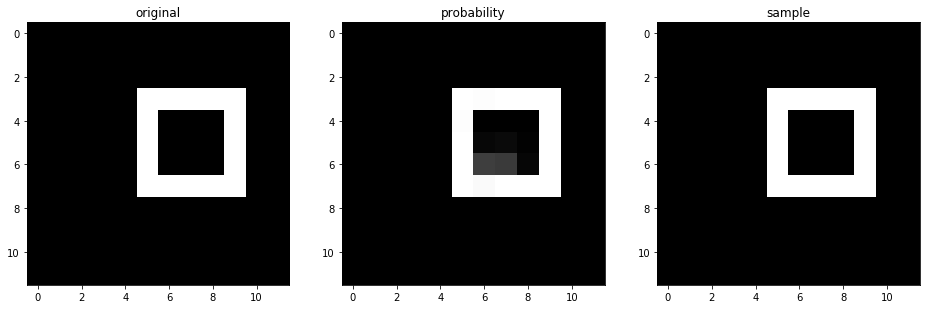

In [25]:
fig,axes = plt.subplots(ncols=3,figsize=(16,16))

i = np.random.choice(len(X))
aa = vae.predict(X[i:i+3])
a = aa[0].reshape(d,d)
b = vae.predict(X[i],'sample').reshape(d,d)

axes[0].imshow(X[i].reshape(d,d),cmap='gray')
axes[0].set_title('original')
axes[1].imshow(a,cmap='gray')
axes[1].set_title('probability')
axes[2].imshow(b,cmap='gray')
axes[2].set_title('sample')
plt.show()

### Generation

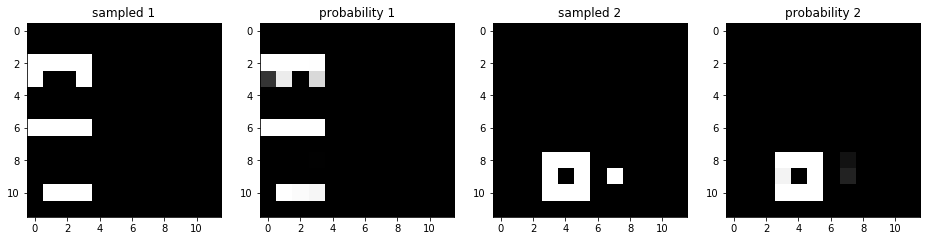

In [26]:
fig,axes = plt.subplots(ncols=4,figsize=(16,16))

c,dd = vae.generate(2,'both')
a,b = c[0].reshape(d,d), dd[0].reshape(d,d)
c,dd = c[1].reshape(d,d), dd[1].reshape(d,d)

axes[0].imshow(a,cmap='gray')
axes[0].set_title('sampled 1')
axes[1].imshow(b,cmap='gray')
axes[1].set_title('probability 1')
axes[2].imshow(c,cmap='gray')
axes[2].set_title('sampled 2')
axes[3].imshow(dd,cmap='gray')
axes[3].set_title('probability 2')
plt.show()

** Latent space contains values that map to non-square output, let's explore the latent space more carefully **

### Manual input to latent space

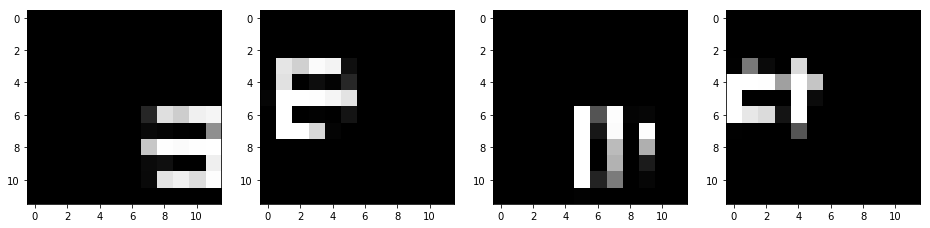

In [27]:
Z_input = np.random.normal(size=(4,4))

fig,axes = plt.subplots(ncols=4,figsize=(16,16))

g = vae.feed(Z_input)
a,b = g[0].reshape(d,d), g[1].reshape(d,d)
c,dd = g[2].reshape(d,d), g[3].reshape(d,d)

axes[0].imshow(a,cmap='gray')
axes[1].imshow(b,cmap='gray')
axes[2].imshow(c,cmap='gray')
axes[3].imshow(dd,cmap='gray')
plt.show()

### Observe latent space

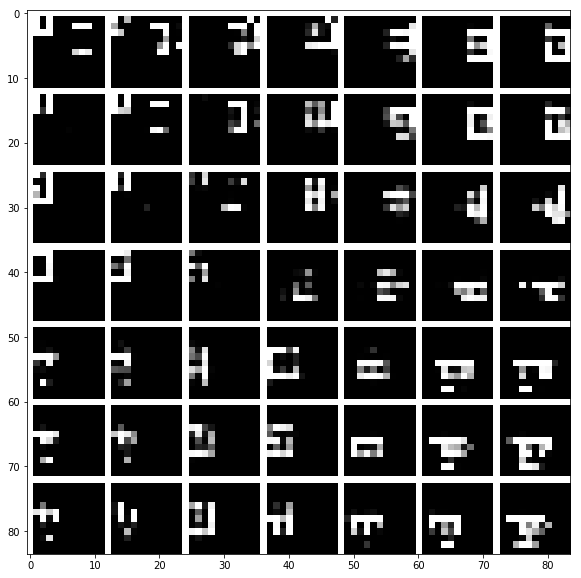

In [29]:
grid = 7
xs = np.linspace(-3, 3, grid)
ys = np.linspace(-3, 3, grid)
latent = np.empty((d * grid, d * grid))

manual_Z = []
for x in xs:
    for y in ys:
        manual_Z.append([x,y,0,0])
        
manual_Z = np.array(manual_Z)
g = vae.feed(manual_Z)

for x in range(grid):
    for y in range(grid):
        idx = x+y*grid
        current = g[idx].reshape(d,d)
        latent[x*d:(x+1)*d,y*d:(y+1)*d] = current
        latent[x*d,:] = 1
        latent[:,y*d] = 1

plt.figure(figsize=(10,10))
plt.imshow(latent,cmap='gray')
plt.show()

x = 0 and y = 1 provides a good starting point (latent features 0 and 1)

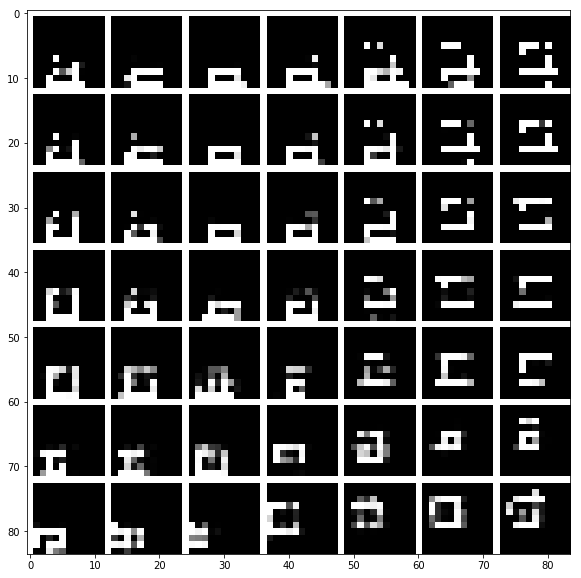

In [35]:
grid = 7
xs = np.linspace(-3, 3, grid)
ys = np.linspace(-6, 0, grid)
latent = np.empty((d * grid, d * grid))

manual_Z = []
for x in xs:
    for y in ys:
        manual_Z.append([0,1,x,y])
        
manual_Z = np.array(manual_Z)
g = vae.feed(manual_Z)

for x in range(grid):
    for y in range(grid):
        idx = x+y*grid
        current = g[idx].reshape(d,d)
        latent[x*d:(x+1)*d,y*d:(y+1)*d] = current
        latent[x*d,:] = 1
        latent[:,y*d] = 1

plt.figure(figsize=(10,10))
plt.imshow(latent,cmap='gray')
plt.show()

After slight adjustment to the range, it seems that within this setting, the latent space features 2 and 3 vaguely translate to position of the rectangle, but the features are mixed with other characteristics as well